In [3]:
%pwd

'/home/nemanja/Desktop/Projects/Kaggle/House_Prices-Advanced_Regression_Techniques/house_price_kaggle/notebooks'

In [4]:
%cd ..

/home/nemanja/Desktop/Projects/Kaggle/House_Prices-Advanced_Regression_Techniques/house_price_kaggle


In [111]:
import pandas as pd 
import numpy as np

from fastai.imports import *     # We are data scientists prototyping models. This is not production code!
from fastai.structured import *  # Importing everything and having everything available is quicker and more useful

from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from IPython.display import display

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_log_error



In [112]:
df_raw = pd.read_csv("data/train.csv") 

In [113]:
df_raw.MSSubClass = df_raw.MSSubClass.astype('object')

In [114]:
def display_all(df):
    with pd.option_context("display.max_rows", 100, "display.max_columns", 100): 
        display(df)

In [115]:
display_all(df_raw.iloc[:100])

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,851,Unf,0,140,991,Gas

In [116]:
df_raw.SalePrice = np.log(df_raw.SalePrice)

In [117]:
df_raw.sort_values(by=['YrSold'], inplace=True, ascending=True)
df_raw['YrSold'].tail(70)

272     2010
1216    2010
288     2010
560     2010
263     2010
        ... 
353     2010
1322    2010
162     2010
158     2010
1284    2010
Name: YrSold, Length: 70, dtype: int64

In [118]:
train_cats(df_raw)

In [119]:
display_all(df_raw.isnull().sum().sort_index()/len(df_raw))

1stFlrSF         0.000000
2ndFlrSF         0.000000
3SsnPorch        0.000000
Alley            0.937671
BedroomAbvGr     0.000000
BldgType         0.000000
BsmtCond         0.025342
BsmtExposure     0.026027
BsmtFinSF1       0.000000
BsmtFinSF2       0.000000
BsmtFinType1     0.025342
BsmtFinType2     0.026027
BsmtFullBath     0.000000
BsmtHalfBath     0.000000
BsmtQual         0.025342
BsmtUnfSF        0.000000
CentralAir       0.000000
Condition1       0.000000
Condition2       0.000000
Electrical       0.000685
EnclosedPorch    0.000000
ExterCond        0.000000
ExterQual        0.000000
Exterior1st      0.000000
Exterior2nd      0.000000
Fence            0.807534
FireplaceQu      0.472603
Fireplaces       0.000000
Foundation       0.000000
FullBath         0.000000
Functional       0.000000
GarageArea       0.000000
GarageCars       0.000000
GarageCond       0.055479
GarageFinish     0.055479
GarageQual       0.055479
GarageType       0.055479
GarageYrBlt      0.055479
GrLivArea   

In [120]:
display_all(df_raw.dtypes)

Id                  int64
MSSubClass       category
MSZoning         category
LotFrontage       float64
LotArea             int64
Street           category
Alley            category
LotShape         category
LandContour      category
Utilities        category
LotConfig        category
LandSlope        category
Neighborhood     category
Condition1       category
Condition2       category
BldgType         category
HouseStyle       category
OverallQual         int64
OverallCond         int64
YearBuilt           int64
YearRemodAdd        int64
RoofStyle        category
RoofMatl         category
Exterior1st      category
Exterior2nd      category
MasVnrType       category
MasVnrArea        float64
ExterQual        category
ExterCond        category
Foundation       category
BsmtQual         category
BsmtCond         category
BsmtExposure     category
BsmtFinType1     category
BsmtFinSF1          int64
BsmtFinType2     category
BsmtFinSF2          int64
BsmtUnfSF           int64
TotalBsmtSF 

In [121]:
df_raw.reset_index(inplace=True, drop=True)
df_raw.drop(axis=1,columns=['Id'],inplace=True)

In [122]:
df, y, nas = proc_df(df_raw, 'SalePrice')

In [123]:
#def split_vals(a,n): return a[:n].copy(), a[n:].copy()

# We split the original train dataset into train and validation 
#n_valid = int(df.shape[0]*0.2)  # same as Kaggle's test set size
#n_trn = len(df) - n_valid
#raw_train, raw_valid = split_vals(df_raw, n_trn)
#X_train, X_valid = split_vals(df, n_trn)
#y_train, y_valid = split_vals(y, n_trn)

#X_train.shape, y_train.shape, X_valid.shape
X_train, X_valid, y_train, y_valid = train_test_split(df, y, test_size=0.25, random_state=420)

In [124]:
display_all(df.iloc[:100])

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontage_na,MasVnrArea_na,GarageYrBlt_na
0,6,4,65.0,7153,2,0,4,4,1,5,1,21,3,3,1,6,6,5,1992,1992,2,2,13,14,3,0.0,3,3,3,3,4,4,1,387,6,0,374,761,2,1,2,5,810,793,0,1603,0,0,2,1,3,1,3,7,7,0,0,2,1992.0,2,2,484,5,5,3,0,124,0,0,0,0,0,0,0,0,7,2006,9,5,False,False,False
1,13,5,21.0,1680,2,0,4,4,1,5,1,3,3,3,4,6,6,5,1971,1971,2,2,6,6,2,236.0,4,5,2,4,4,4,6,0,6,0,672,672,2,5,2,5,672,546,0,1218,0,0,1,1,3,1,4,7,7,0,0,0,1980.0,0,0,0,0,0,1,201,0,0,0,0,0,0,0,0,0,4,2006,9,1,False,False,True
2,1,2,60.0,7200,2,2,4,4,1,5,1,22,3,3,1,3,6,5,2006,2006,2,2,13,14,4,68.0,3,5,3,3,4,4,3,905,6,0,357,1262,2,3,2,5,1262,0,0,1262,0,0,2,0,2,1,3,5,7,0,0,2,2006.0,1,2,572,5,5,3,0,120,0,0,0,0,0,0,0,0,5,2006,7,6,False,False,False
3,11,4,69.0,7032,2,0,1,4,1,1,1,13,3,3,3,7,5,5,1979,1979,2,2,9,9,3,0.0,4,5,2,3,4,2,3,943,6,0,0,943,2,5,2,5,943,0,0,943,1,0,1,0,2,1,4,4,7,2,5,6,1979.0,3,2,600,5,5,3,42,0,0,0,0,0,0,0,0,0,12,2006,9,5,True,False,False
4,1,4,66.0,7800,2,0,1,4,1,5,1,13,3,3,1,3,5,5,1964,1964,2,2,14,15,3,0.0,4,5,2,4,4,4,5,312,4,600,0,912,2,5,2,5,912,0,0,912,0,0,1,0,2,1,4,5,7,0,0,2,1964.0,3,1,288,5,5,3,0,0,0,0,0,0,0,0,0,0,11,2006,9,1,False,False,False
5,1,4,60.0,7332,2,0,4,4,1,5,1,13,3,3,1,3,6,6,1959,1959,2,2,15,16,2,207.0,4,5,2,4,4,4,2,414,6,0,450,864,2,1,2,5,864,0,0,864,1,0,1,0,2,1,3,4,7,0,0,2,1959.0,3,1,288,5,5,3,168,0,0,0,0,0,0,0,0,0,10,2006,9,1,False,False,False
6,1,4,89.0,10680,2,0,4,4,1,5,1,13,3,3,1,3,5,3,1951,1951,4,2,14,15,2,44.0,4,5,2,4,1,4,4,756,6,0,1380,2136,2,5,1,1,2136,0,0,2136,0,0,2,0,4,1,4,7,5,0,0,6,1951.0,3,2,528,5,5,3,0,30,0,0,0,0,0,3,0,0,10,2006,9,5,False,False,False
7,9,4,96.0,11777,2,0,1,4,1,5,1,20,3,3,1,8,5,6,1966,1966,2,2,13,14,2,97.0,4,5,2,4,4,1,4,328,1,551,285,1164,2,1,2,5,1320,0,0,1320,1,0,1,0,3,1,4,6,7,2,2,2,1966.0,2,2,564,5,5,3,160,68,240,0,0,0,0,0,0,0,5,2006,9,1,False,False,False
8,6,2,84.0,10728,2,0,4,4,1,5,1,22,3,3,1,6,8,5,2006,2006,2,2,13,14,3,0.0,3,5,3,3,4,3,6,0,6,0,1095,1095,2,3,2,5,1095,844,0,1939,0,0,2,1,3,1,3,8,7,1,3,2,2006.0,2,3,1053,5,5,3,192,51,0,0,0,0,0,0,0,0,8,2006,7,6,False,False,False
9,2,4,51.0,5900,2,0,1,1,1,5,1,4,3,3,1,3,4,7,1923,1958,2,2,14,15,3,0.0,4,5,3,3,4,4,6,0,6,0,440,440,2,5,2,1,869,0,0,869,0,0,1,0,2,1,2,4,7,0,0,0,1980.0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,8,2006,9,5,False,False,True


In [125]:
display_all(df_raw.iloc[:100])

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,7153,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,2Story,6,5,1992,1992,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,Gd,PConc,Gd,TA,No,ALQ,387,Unf,0,374,761,GasA,Ex,Y,SBrkr,810,793,0,1603,0,0,2,1,3,1,Gd,7,Typ,0,NaN,Attchd,1992.0,RFn,2,484,TA,TA,Y,0,124,0,0,0,0,NaN,NaN,NaN,0,7,2006,WD,Normal,12.077671
1,160,RM,21.0,1680,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,BrDale,Norm,Norm,Twnhs,2Story,6,5,1971,1971,Gable,CompShg,CemntBd,CmentBd,BrkFace,236.0,TA,TA,CBlock,TA,TA,No,Unf,0,Unf,0,672,672,GasA,TA,Y,SBrkr,672,546,0,1218,0,0,1,1,3,1,TA,7,Typ,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,N,201,0,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,11.424094
2,20,FV,60.0,7200,Pave,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,6,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,Stone,68.0,Gd,TA,PConc,Gd,TA,No,GLQ,905,Unf,0,357,1262,GasA,Gd,Y,SBrkr,1262,0,0,1262,0,0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,2006.0,Fin,2,572,TA,TA,Y,0,120,0,0,0,0,NaN,NaN,NaN,0,5,2006,New,Partial,12.128111
3,90,RL,NaN,7032,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,Duplex,SFoyer,5,5,1979,1979,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,GLQ,943,Unf,0,0,943,GasA,TA,Y,SBrkr,943,0,0,943,1,0,1,0,2,1,TA,4,Typ,2,TA,Detchd,1979.0,Unf,2,600,TA,TA,Y,42,0,0,0,0,0,NaN,NaN,NaN,0,12,2006,WD,Normal,11.820116
4,20,RL,66.0,7800,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,5,1964,1964,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,312,LwQ,600,0,912,GasA,TA,Y,SBrkr,912,0,0,912,0,0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1964.0,Unf,1,288,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,11,2006,WD,Abnorml,11.652687
5,20,RL,60.0,7332,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1959,1959,Gable,CompShg,WdShing,Wd Shng,BrkFace,207.0,TA,TA,CBlock,TA,TA,No,BLQ,414,Unf,0,450,864,GasA,Ex,Y,SBrkr,864,0,0,864,1,0,1,0,2,1,Gd,4,Typ,0,NaN,Attchd,1959.0,Unf,1,288,TA,TA,Y,168,0,0,0,0,0,NaN,NaN,NaN,0,10,2006,WD,Abnorml,11.695247
6,20,RL,89.0,10680,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,3,1951,1951,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,44.0,TA,TA,CBlock,TA,Fa,No,LwQ,756,Unf,0,1380,2136,GasA,TA,N,FuseA,2136,0,0,2136,0,0,2,0,4,1,TA,7,Mod,0,NaN,Detchd,1951.0,Unf,2,528,TA,TA,Y,0,30,0,0,0,0,NaN,MnPrv,NaN,0,10,2006,WD,Normal,11.834284
7,80,RL,96.0,11777,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,SLvl,5,6,1966,1966,Gable,CompShg,VinylSd,VinylSd,BrkFace,97.0,TA,TA,CBlock,TA,TA,Av,LwQ,328,ALQ,551,285,1164,GasA,Ex,Y,SBrkr,1320,0,0,1320,1,0,1,0,3,1,TA,6,Typ,2,Fa,Attchd,1966.0,RFn,2,564,TA,TA,Y,160,68,240,0,0,0,NaN,NaN,NaN,0,5,2006,WD,Abnorml,12.010666
8,60,FV,84.0,10728,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,2Story,8,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,Mn,Unf,0,Unf,0,1095,1095,GasA,Gd,Y,SBrkr,1095,844,0,1939,0,0,2,1,3,1,Gd,8,Typ,1,Gd,Attchd,2006.0,RFn,3,1053,TA,TA,Y,192,51,0,0,0,0,NaN,NaN,NaN,0,8,2006,New,Partial,12.491252
9,30,RL,51.0,5900,Pave,NaN,IR1,Bnk,AllPub,Inside,Gtl,BrkSide,Norm,Norm,1Fam,1Story,4,7,1923,1958,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,440,440,GasA,TA,Y,FuseA,869,0,0,869,0,0,1,0,2,

In [126]:
def rmse(predictions, actuals): 
    return math.sqrt(((predictions - actuals)**2).mean())

def print_score(m):
    # RMSE for training, RMSE for validation, r^2 (accuracy) for training, r^2 for validation
    res = [rmse(m.predict(X_train), y_train), rmse(m.predict(X_valid), y_valid),
                m.score(X_train, y_train), m.score(X_valid, y_valid)]
    if hasattr(m, 'oob_score_'): res.append(m.oob_score_)
    print(res)

In [127]:
m = RandomForestRegressor(n_estimators=500, min_samples_leaf=5, max_features=0.5, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[0.09842550538598138, 0.1262197749253313, 0.9404815312108574, 0.8916106205936085, 0.8642445177650759]


In [128]:
fi = rf_feat_importance(m, df)
fi[:10] # Top 10

,cols,imp
16,OverallQual,0.334688
45,GrLivArea,0.148439
18,YearBuilt,0.116802
37,TotalBsmtSF,0.039164
42,1stFlrSF,0.036398
60,GarageCars,0.036207
61,GarageArea,0.035292
26,ExterQual,0.027017
56,FireplaceQu,0.017988
48,FullBath,0.017759


In [138]:
to_keep = fi[fi.imp>0.005].cols
len(to_keep)

21

In [141]:
df_keep = df[to_keep].copy()
X_train, X_valid, y_train, y_valid = train_test_split(df_keep, y, test_size=0.25, random_state=420)

In [142]:
m = RandomForestRegressor(n_estimators=500, min_samples_leaf=5, max_features=0.5, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[0.10334296467587882, 0.12830646816176827, 0.9343857339143254, 0.8879971618342606, 0.8652139217817814]


In [88]:
df_trn, y_trn, nas = proc_df(df_raw, 'SalePrice', max_n_cat=10)
X_train, X_valid, y_train, y_valid = train_test_split(df_trn, y_trn, test_size=0.25, random_state=420)

m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features=0.5, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[0.08037683032989797, 0.12387531157915382, 0.9603084376253244, 0.8955997721243765, 0.8604589950319054]


In [143]:
fi = rf_feat_importance(m, df_keep)
fi[:10] # Top 10

,cols,imp
0,OverallQual,0.351653
1,GrLivArea,0.147139
2,YearBuilt,0.112581
5,GarageCars,0.044445
6,GarageArea,0.043051
4,1stFlrSF,0.042146
3,TotalBsmtSF,0.039126
7,ExterQual,0.028041
10,BsmtFinSF1,0.020795
14,GarageYrBlt,0.019994


In [145]:
from scipy.cluster import hierarchy as hc
scipy.__version__

'1.5.0'

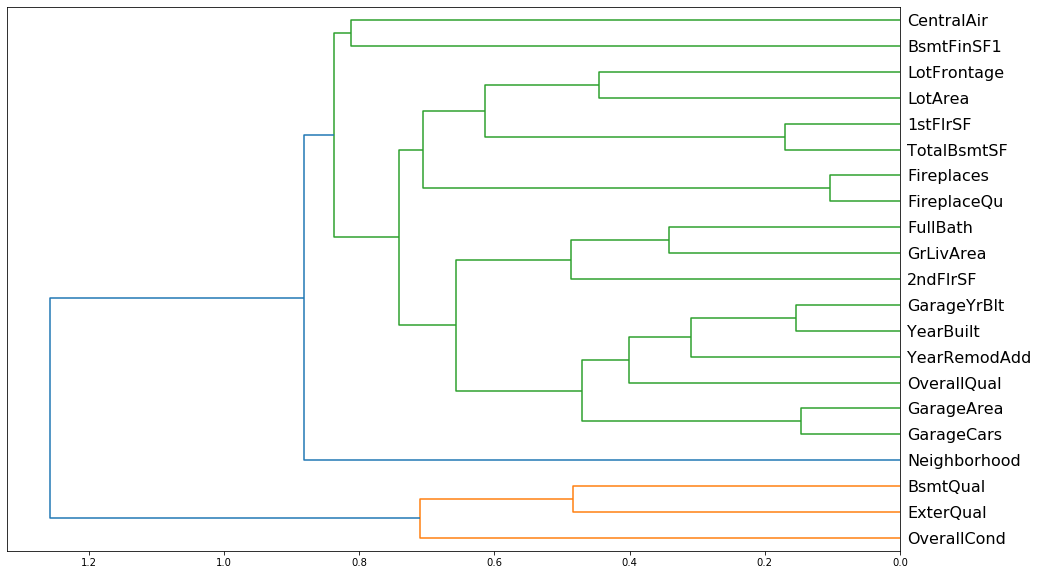

In [169]:
corr = np.round(scipy.stats.spearmanr(df_keep).correlation, 4) # correlation matrix
corr_condensed = hc.distance.squareform(1-corr)                # distances matrix
z = hc.linkage(corr_condensed, method='average')               # hierarchical/agglomerative clustering

fig = plt.figure(figsize=(16,10))
dendrogram = hc.dendrogram(z, labels = list(df_keep.columns), orientation='left', leaf_font_size=16)
plt.show()

In [163]:
labels = df_keep.columns

In [168]:
list(labels)

['OverallQual',
 'GrLivArea',
 'YearBuilt',
 'TotalBsmtSF',
 '1stFlrSF',
 'GarageCars',
 'GarageArea',
 'ExterQual',
 'FireplaceQu',
 'FullBath',
 'BsmtFinSF1',
 'YearRemodAdd',
 'LotArea',
 'Fireplaces',
 'GarageYrBlt',
 'CentralAir',
 'OverallCond',
 '2ndFlrSF',
 'LotFrontage',
 'Neighborhood',
 'BsmtQual']

In [98]:
df_keep.columns.shape

(22,)

In [99]:
df_keep

,OverallQual,GrLivArea,YearBuilt,TotalBsmtSF,1stFlrSF,GarageCars,GarageArea,ExterQual,FullBath,BsmtFinSF1,...,YearRemodAdd,Fireplaces,GarageYrBlt,CentralAir,OverallCond,2ndFlrSF,LotFrontage,BsmtQual,Neighborhood,MSZoning
0,6,1603,1992,761,810,2,484,3,2,387,...,1992,0,1992.0,2,5,793,65.0,3,21,4
1,6,1218,1971,672,672,0,0,4,1,0,...,1971,0,1980.0,2,5,546,21.0,4,3,5
2,6,1262,2006,1262,1262,2,572,3,2,905,...,2006,0,2006.0,2,5,0,60.0,3,22,2
3,5,943,1979,943,943,2,600,4,1,943,...,1979,2,1979.0,2,5,0,69.0,3,13,4
4,5,912,1964,912,912,1,288,4,1,312,...,1964,0,1964.0,2,5,0,66.0,4,13,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,6,720,1928,624,720,2,484,4,1,0,...,2003,0,2005.0,2,8,0,60.0,4,18,5
1456,7,1923,1992,750,1061,2,564,3,2,674,...,1992,1,1992.0,2,5,862,107.0,3,16,4
1457,7,1541,2005,1541,1541,2,532,3,2,1201,...,2005,1,2005.0,2,5,0,95.0,3,17,4
1458,7,1947,2004,991,991,2,678,3,2,222,...,2005,1,2004.0,2,5,956,100.0,3,22,2


In [139]:
df_keep.columns

Index(['OverallQual', 'GrLivArea', 'YearBuilt', 'TotalBsmtSF', '1stFlrSF',
       'GarageCars', 'GarageArea', 'ExterQual', 'FireplaceQu', 'FullBath',
       'BsmtFinSF1', 'YearRemodAdd', 'LotArea', 'Fireplaces', 'GarageYrBlt',
       'CentralAir', 'OverallCond', '2ndFlrSF', 'LotFrontage', 'Neighborhood',
       'BsmtQual', 'MSZoning', 'GarageType'],
      dtype='object')

In [147]:
corr_condensed.shape

(210,)

In [148]:
corr.shape

(21, 21)

In [158]:
df_keep.columns.shape

(21,)

In [156]:
z.shape

(20, 4)